In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
diabetes_df = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [58]:
#Check any missing values

missing_values = diabetes_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [59]:
# Check for duplicate rows
duplicate_rows = diabetes_df[diabetes_df.duplicated()]

# Print the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
    print(duplicate_rows.count())
else:
    print("No duplicate rows found.")

Duplicate Rows:
       gender   age  hypertension  heart_disease smoking_history    bmi   
2756     Male  80.0             0              0         No Info  27.32  \
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6             

In [60]:
# Display basic statistical properties of the dataset
print("Statistical Properties of the Dataset:")
print("-------------------------------------")
print("Number of rows: ", diabetes_df.shape[0])
print("Number of columns: ", diabetes_df.shape[1])
print("\n")
print("Descriptive Statistics:")
print("-----------------------")
print(diabetes_df.describe())

Statistical Properties of the Dataset:
-------------------------------------
Number of rows:  100000
Number of columns:  9


Descriptive Statistics:
-----------------------
                 age  hypertension  heart_disease            bmi   
count  100000.000000  100000.00000  100000.000000  100000.000000  \
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.70

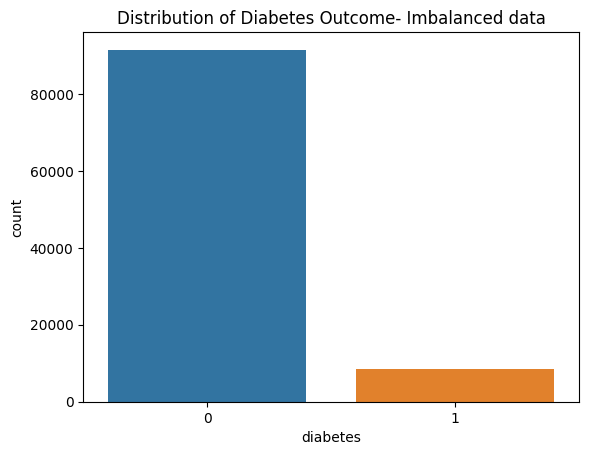

In [61]:
# Visualize the distribution of the target variable
sns.countplot(x='diabetes', data=diabetes_df)
plt.title('Distribution of Diabetes Outcome- Imbalanced data')
plt.show()

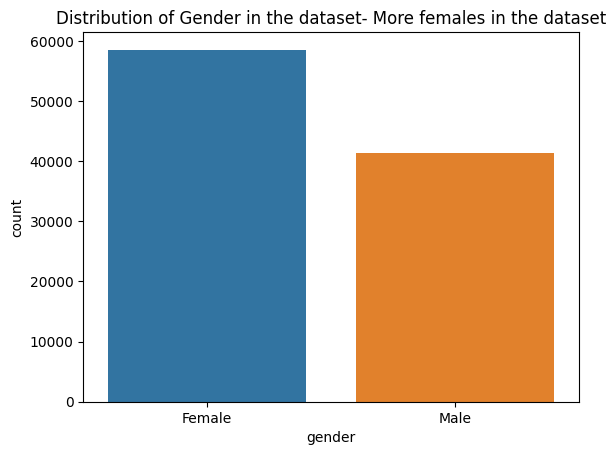

In [62]:
# Visualize the distribution of the gender variable
sns.countplot(x='gender', data=diabetes_df[diabetes_df['gender']!='Other'])
plt.title('Distribution of Gender in the dataset- More females in the dataset')
plt.show()

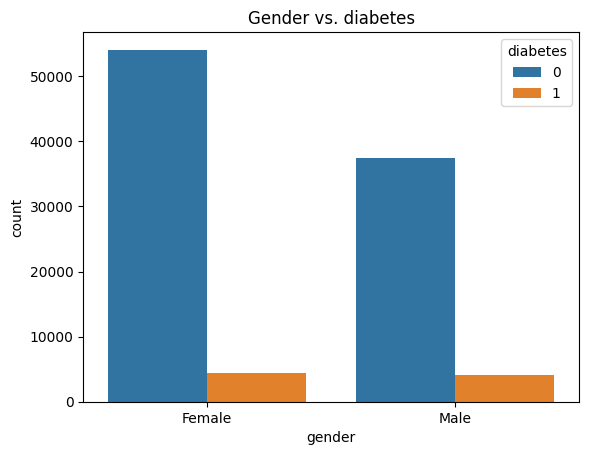

In [63]:
# Visualize the distribution of the gender variable

sns.countplot(x='gender', data=diabetes_df[diabetes_df['gender']!='Other'], hue = 'diabetes')
plt.title('Gender vs. diabetes')
plt.show()

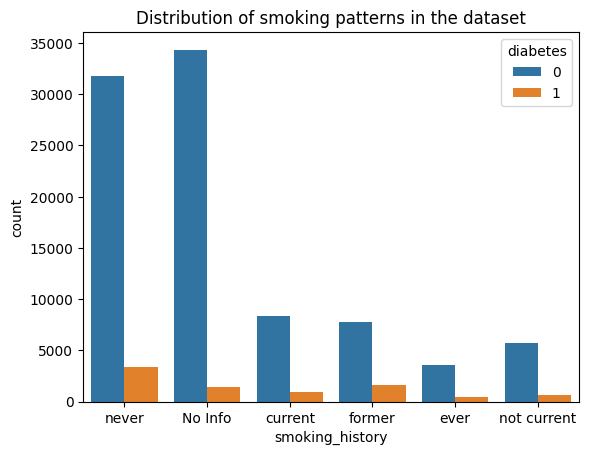

In [64]:
# Visualize the distribution of the smoking patterns
sns.countplot(x='smoking_history', data=diabetes_df, hue = 'diabetes')
plt.title('Distribution of smoking patterns in the dataset')
plt.show()

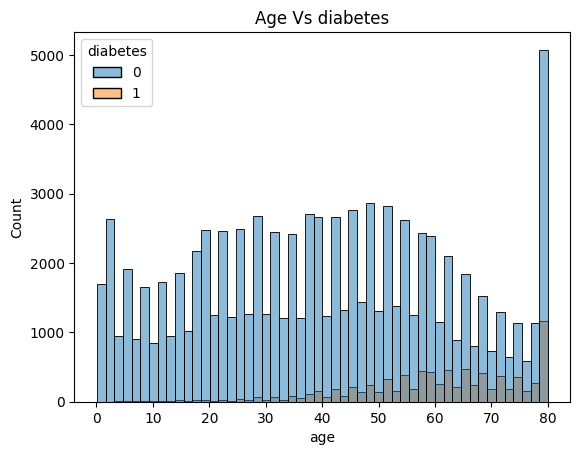

In [65]:
# Age Vs diabetes
sns.histplot(x='age', data=diabetes_df, hue = 'diabetes')
plt.title('Age Vs diabetes')
plt.show()

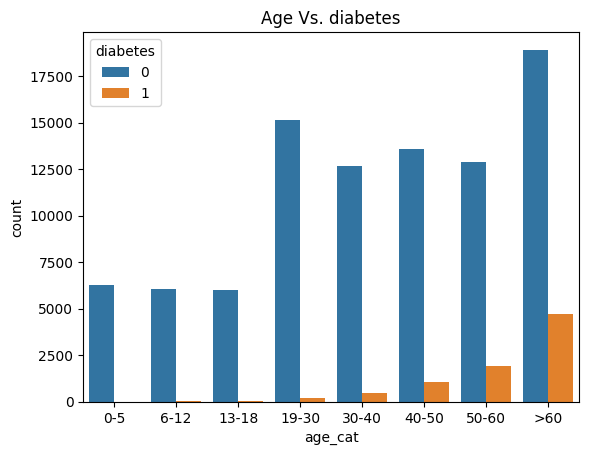

In [66]:
diabetes_df['age_cat'] = pd.cut(diabetes_df['age'], bins = [0,5,12,18,30,40, 50, 60, 120],
                                labels = ['0-5', '6-12','13-18', '19-30', '30-40', '40-50', '50-60', '>60'])

temp = diabetes_df[['age_cat', 'diabetes']]

sns.countplot(x='age_cat', data=temp, hue = 'diabetes')
plt.title('Age Vs. diabetes')
plt.show()

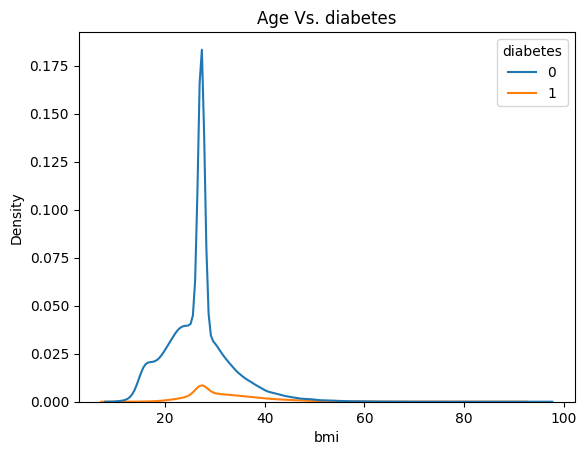

In [70]:
sns.kdeplot(x='bmi', data=diabetes_df, hue = 'diabetes')
plt.title('Age Vs. diabetes')
plt.show()

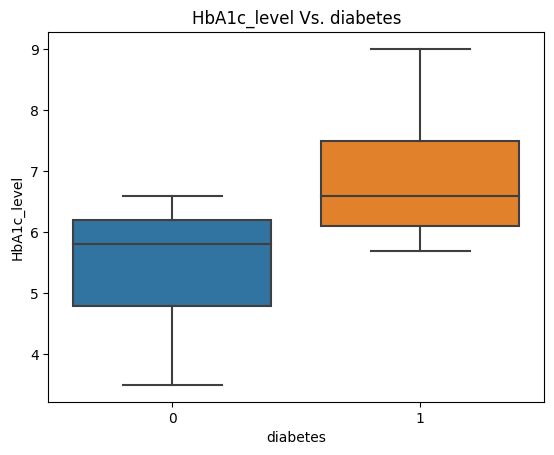

In [71]:
sns.boxplot(x = 'diabetes', y='HbA1c_level', data=diabetes_df)
plt.title('HbA1c_level Vs. diabetes')
plt.show()

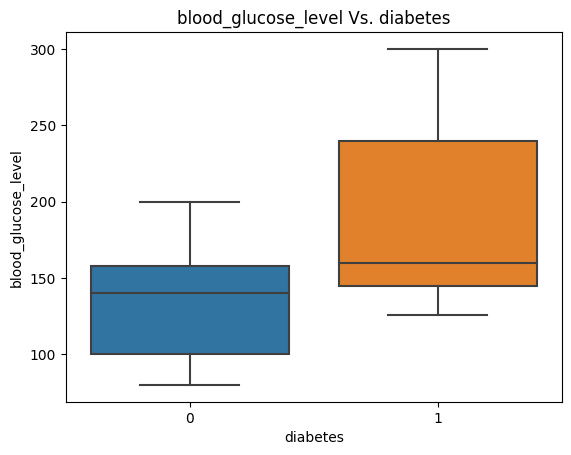

In [72]:
sns.boxplot(x = 'diabetes', y='blood_glucose_level', data=diabetes_df)
plt.title('blood_glucose_level Vs. diabetes')
plt.show()

In [ ]:
sns.boxplot(x = 'diabetes', y='bmi', data=diabetes_df)
plt.title('BMI Vs. diabetes')
plt.show()

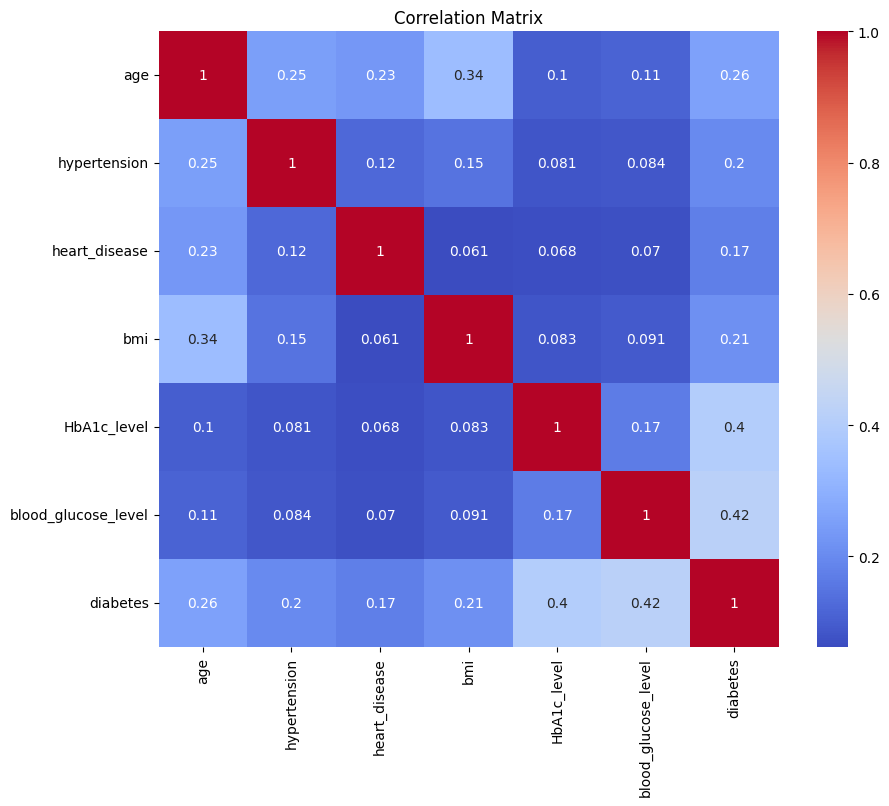

In [68]:
# Visualize the correlation matrix
numeric_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
plt.figure(figsize=(10, 8))
sns.heatmap(diabetes_df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()